[[1, -2.935550468452083, -0.08422774458945556], [1, -0.016340202690365752, 1.2473083009531298], [1, 0.8753488187648066, 0.3499703555613481], [1, 0.3829743136947581, -1.4194223623607187], [1, 0.029560440723422184, -0.7091535182663106], [1, -0.5247357224568826, -0.9301031631470575], [1, 0.14093498055161213, -0.18690241786630651], [1, 1.1526585855549603, 0.8624071874026685], [1, 1.3695909285502061, -0.46347188111815385], [1, -2.283276741770083, 0.9419233789377867], [1, -0.6425199478491236, 0.17803715587968766], [1, -1.5867654275321503, -0.880375945972439], [1, 0.7302069895258712, -0.1452389891767321], [1, 1.2192353412784935, 0.29511694467869015], [1, -1.1839744449845473, 1.0646559340619925], [1, -0.00506321553152978, 0.9924015552834564], [1, 0.3625404338004668, -0.9437980728055481], [1, 0.5133457351640569, -0.3114255603842895], [1, -0.4672426754039882, 0.5740164930323224], [1, 0.8273756440670668, 0.4314438856222653], [1, -0.7042689640018599, 1.3162613307640487], [1, 0.6960454295191633, 0.

RecursionError: ignored

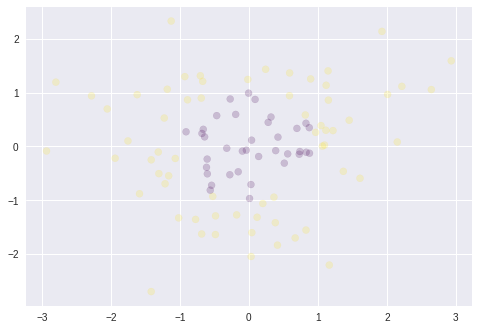

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import math
import seaborn as sns
weights_1=[]
weights_2=[]
weights_bias=[]
class Perceptron:

    def __init__(self,weights=None,errors=None,step=None):
        self.weights=weights
        self.errors=errors
        self.step=step


    def create_data(self,m,k,epsilon):
        """
        Function to create data set
        :param m: The size of data set
        :param k: Number of features
        :param epsilon: The factor that can control the margin
        :return: Pandas Data Frame (m x k)

        """
        lst1=[]
        if self.step is None:
            self.step=0
        if self.weights is None:
            self.weights=np.zeros(k+1)
        if self.errors is None:
            self.errors=np.zeros(m)
            self.errors+=-1
        # for i in range(0,k+1):
        #     self.weights.append(0)
        data=[] # list of lists to hold data rows
        column_names=[] # column names
        for i in range(0,k+1):
            column_names.append("X"+str(i))
        column_names.append("Y")

        for i in range(m):
            lst=[]# list to hold row information
            lst.append(1)

            lst=lst+(list(np.random.normal(0,1,k)))
#             d=np.random.exponential(1)
#             lst.append(np.random.choice([epsilon+d,-epsilon-d],p=[0.5,0.5]))
            data.append(lst)
            #X=np.matrix(data)
            temp=0
            for i in lst:
                temp+=i*i
            if temp>=k:
                lst1.append(1)
            else:
                lst1.append(-1)

        return (data,np.array(lst1))

    def predict(self,X):

        predictions=[]
        for i in range(len(X)):
            activation = 0
            for j in range(1,len(X[0])):
                activation+=self.weights[j]*X[i][j]
            activation+=self.weights[0]
            if activation>=0:
                predictions.append(1)
            else:
                predictions.append(-1)
        return np.array(predictions)


    def accuracy(self,y,pred_y):


        if np.array_equal(y,pred_y):

            return 1
        else:
            return -1


    def fit(self, X, y):


        predictions=self.predict(X)# returns a numpy array with predictions
        self.errors=predictions-y
        if self.accuracy(y,predictions)==1: # checking if all the rows are properly classified
            return
        else:
            for i in range(len(X)):
                if predictions[i]!=y[i]:
                    print(self.weights)
                    weights_1.append(self.weights[1])
                    weights_2.append(self.weights[2])
                    weights_bias.append(self.weights[0])
                   
                    self.step = self.step + 1
                    temp=y[i]
                    self.weights[0]=self.weights[0]+temp
                    for j in range(1,len(X[0])):
                        self.weights[j]=self.weights[j]+temp*X[i][j]
                    self.fit(X,y)
                    break




model=Perceptron()
data=model.create_data(100,2,1)
print(data[0])
x=pd.DataFrame(data[0])
x["Y"]=data[1]
print(data[1])
plt.scatter(x.iloc[:,1], x.iloc[:,2], alpha=0.2, c=x["Y"], cmap="viridis")
model.fit(data[0],data[1])
# print(model.weights)

    #def fit(self,X,y):
# p=np.zeros(5)
# dict_steps={}
# dict_100={}
# dict_1000={}
# for i in tqdm(range(2,40)):
#     steps=0
#     for j in range(100):
#         model=Perceptron()
#         data=model.create_data(100,i,1)
#         model.fit(data[0],data[1])
#         steps+=model.step
#     dict_100[i]=steps/100
#     print(dict_100)
# for i in tqdm(range(2,40)):
#     steps=0
#     for j in range(100):
#         model=Perceptron()
#         data=model.create_data(1000,i,1)
#         model.fit(data[0],data[1])
#         steps+=model.step
#     dict_1000[i]=steps/100
#     print(dict_1000)
# plt.ylim(0,140)
# plt.plot(dict_100.keys(),dict_100.values(),label="m=100")
# plt.plot(dict_1000.keys(),dict_1000.values(),label="m=1000")
# plt.xlabel("The number of features")
# plt.ylabel("Average number of steps")
# plt.legend()
# plt.show()






#model.fit(data[0],data[1])


Text(0, 0.5, 'The value of bias')

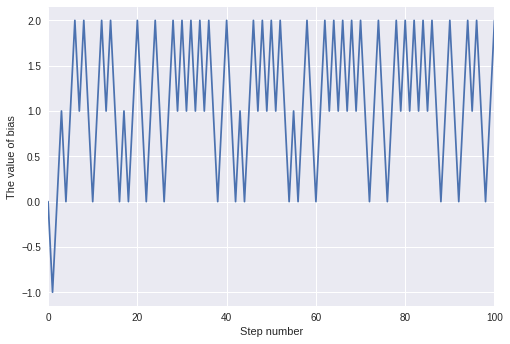

In [32]:
plt.plot(weights_bias)
plt.xlim(0,100)
plt.xlabel("Step number")
plt.ylabel("The value of bias")

Text(0, 0.5, 'The value of weight vector coefficient for feature 1 ')

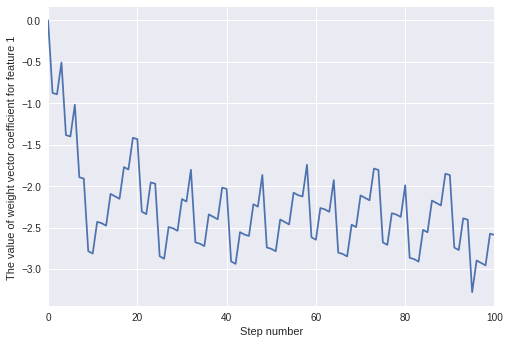

In [31]:
plt.plot(weights_1)
plt.xlim(0,100)
plt.xlabel("Step number")
plt.ylabel("The value of weight vector coefficient for feature 1 ")

Text(0, 0.5, 'The value of weight vector coefficient for feature 2 ')

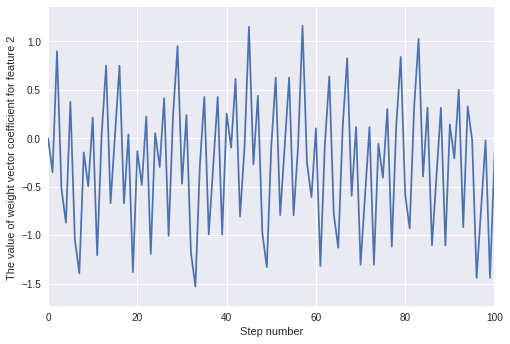

In [30]:
plt.plot(weights_2)
plt.xlim(0,100)
plt.xlabel("Step number")
plt.ylabel("The value of weight vector coefficient for feature 2 ")